In [1]:
import visualize_prediction as V
import pandas as pd

#suppress pytorch warnings about source code changes
import warnings
warnings.filterwarnings('ignore')

## Loading dataset

In [2]:
PATH_TO_IMAGES = "../data/"
PATH_TO_MODEL = "results/checkpoint"

In [3]:
dataloader,model= V.load_rsna_data(PATH_TO_IMAGES,PATH_TO_MODEL,fold='val')
print(model)
print(len(dataloader))

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
    (relu0): ReLU(inplace)
    (pool0): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), dilation=(1, 1), ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm.1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
        (relu.1): ReLU(inplace)
        (conv.1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm.2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True)
        (relu.2): ReLU(inplace)
        (conv.2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm.1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True)
        (relu.1): ReLU(inplace)
        (conv.1): Conv2d(96, 128, kernel_size=(1, 1), stride=(1, 1), bias

Process Process-1:
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.5/dist-packages/torch/utils/data/dataloader.py", line 50, in _worker_loop
    r = index_queue.get()
  File "/usr/lib/python3.5/multiprocessing/queues.py", line 343, in get
    res = self._reader.recv_bytes()
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
KeyboardInterrupt


## Applying the prediction model

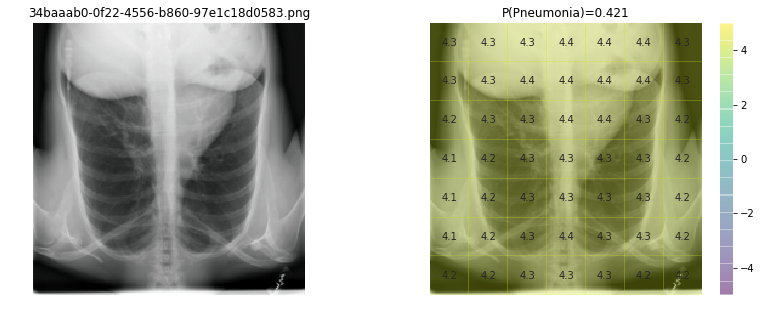

Finding Predicted Probability  Ground Truth
6            Pneumonia                 0.421         False
0          Atelectasis                 0.045         False
1         Cardiomegaly                 0.045         False
2             Effusion                 0.045         False
3         Infiltration                 0.045         False
4                 Mass                 0.045         False
5               Nodule                 0.045         False
7         Pneumothorax                 0.045         False
8        Consolidation                 0.045         False
9                Edema                 0.045         False
10           Emphysema                 0.045         False
11            Fibrosis                 0.045         False
12  Pleural_Thickening                 0.045         False
13              Hernia                 0.045         False

In [4]:
LABEL='Pneumonia'
preds = V.show_next(dataloader, model, LABEL)
preds

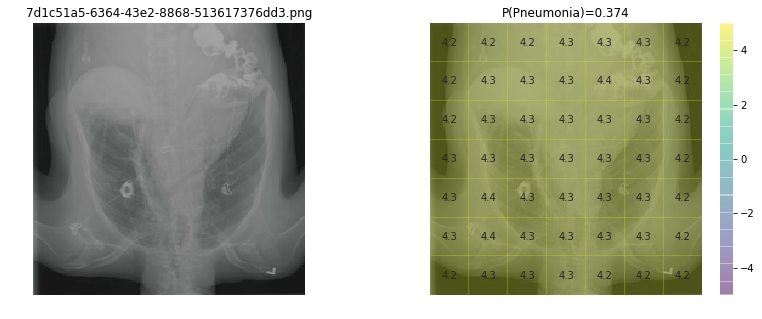

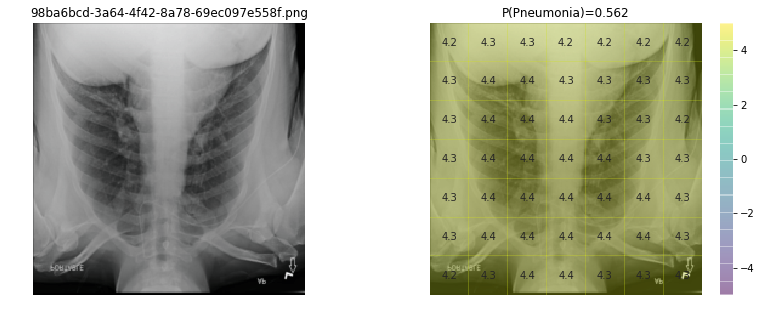

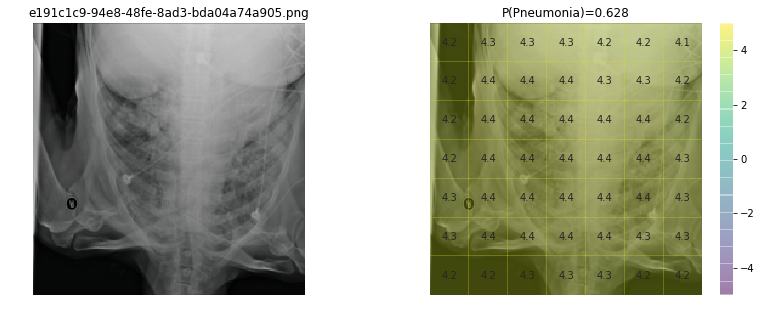

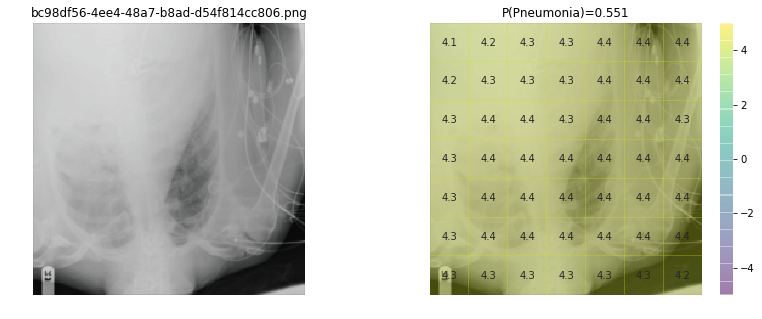

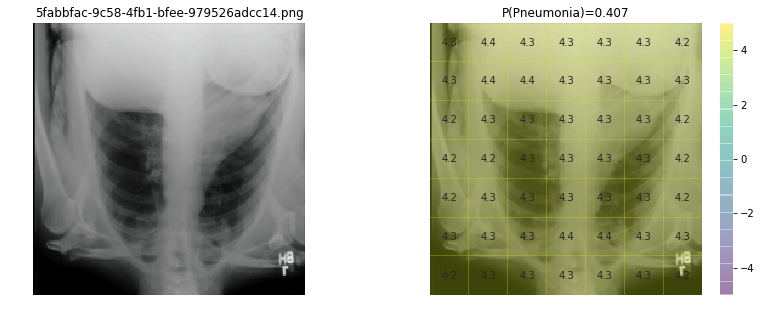

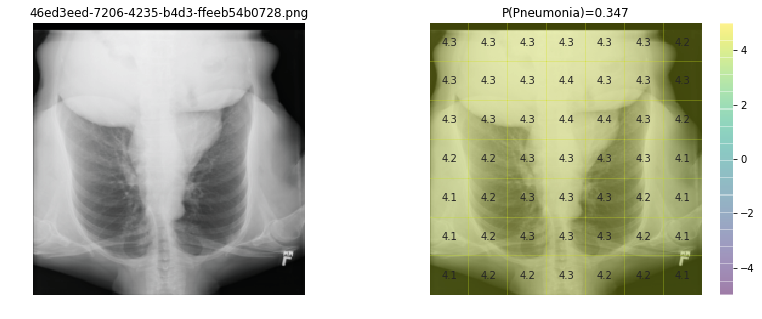

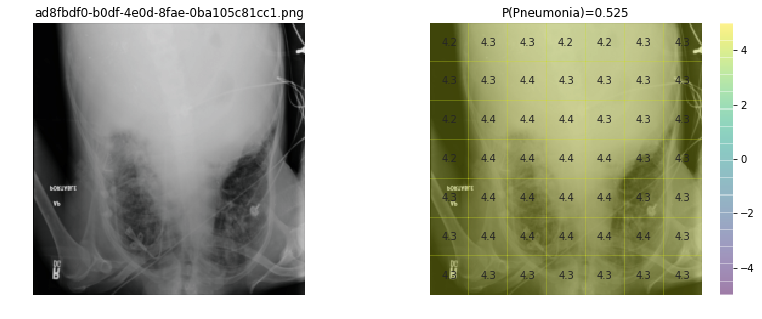

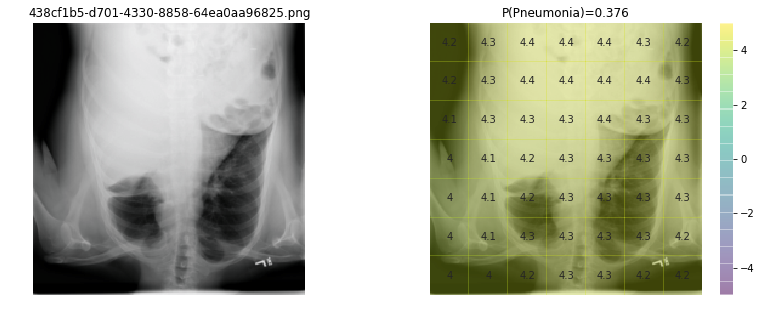

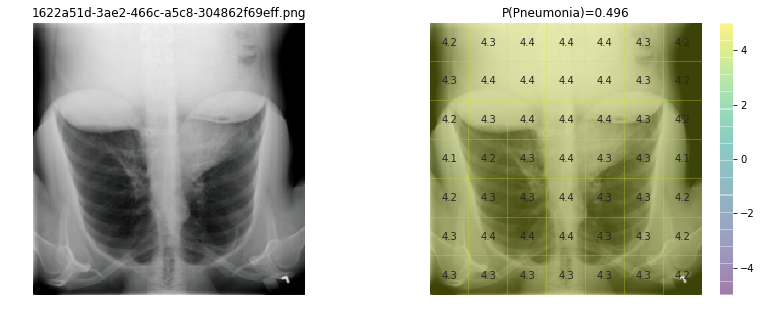

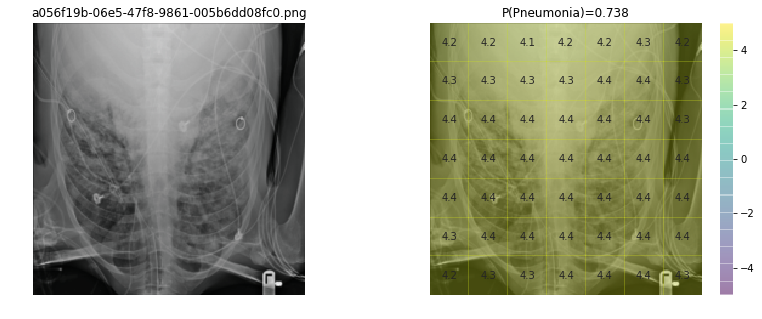

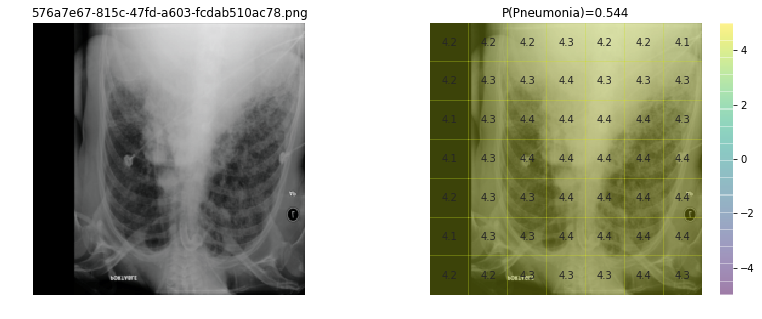

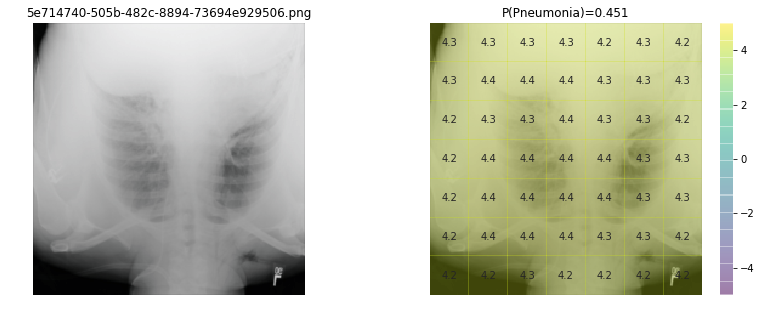

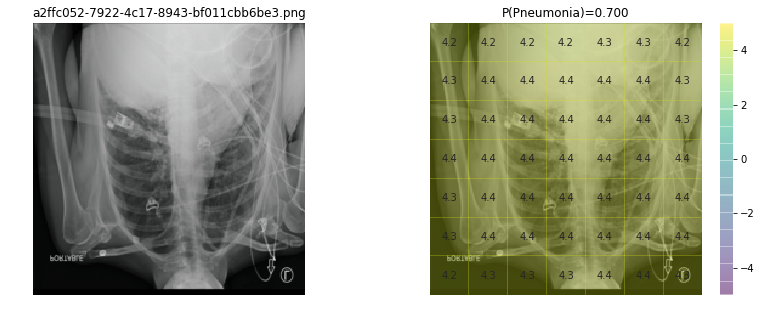

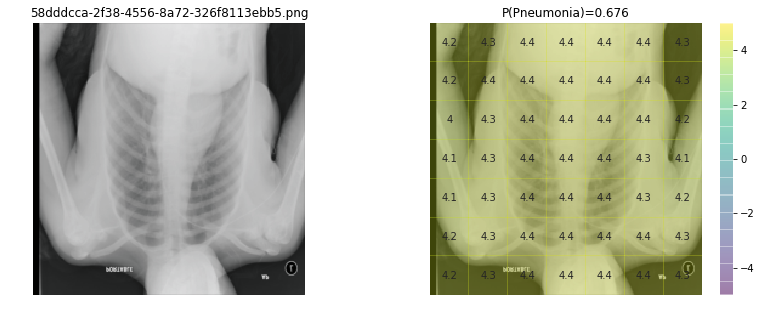

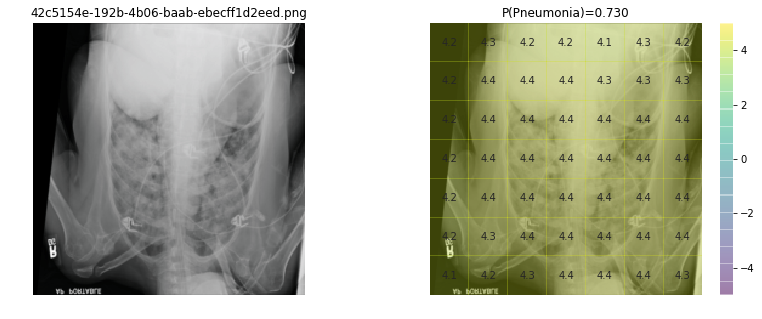

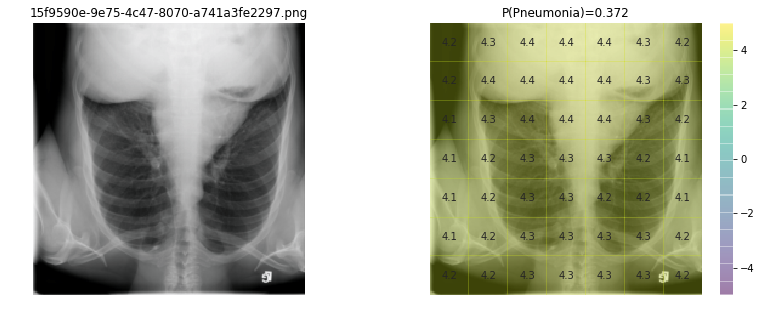

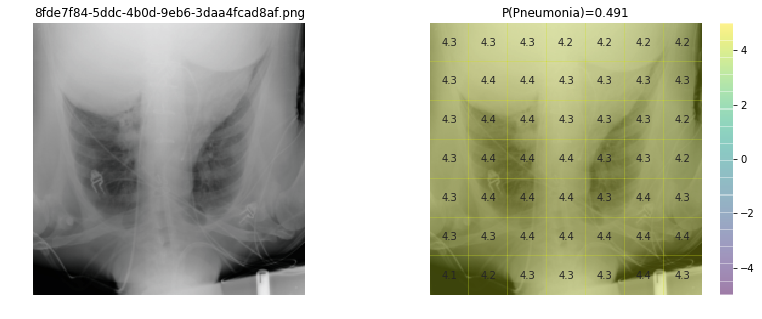

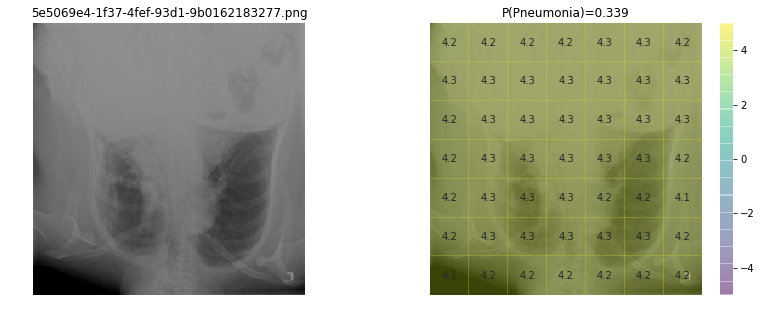

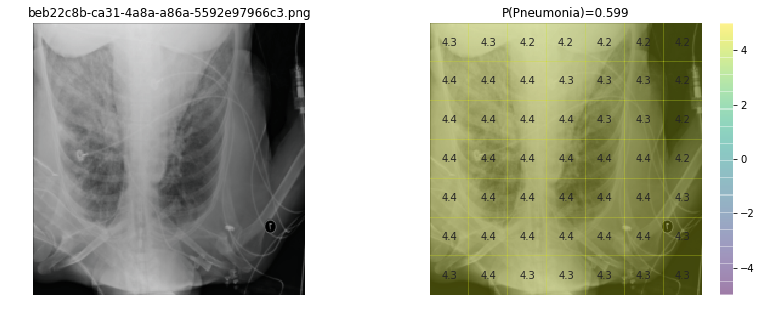

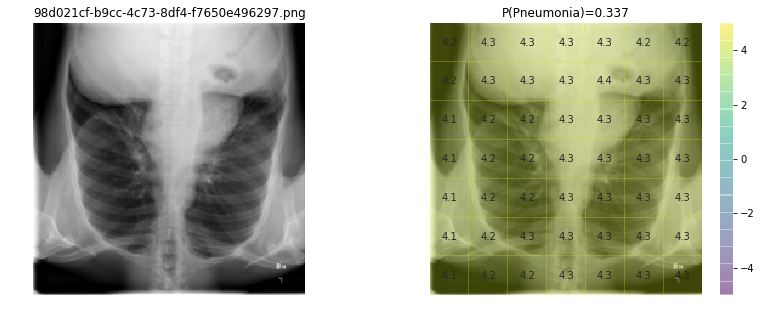

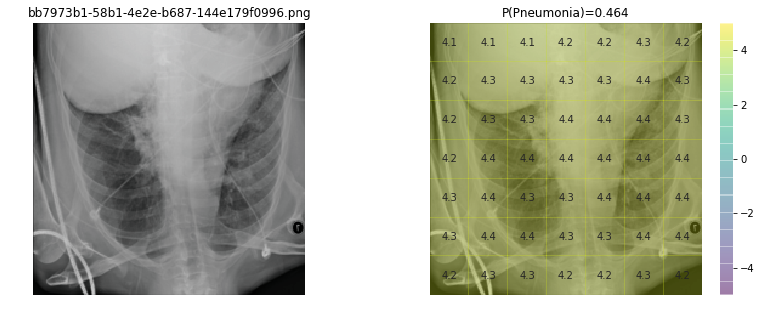

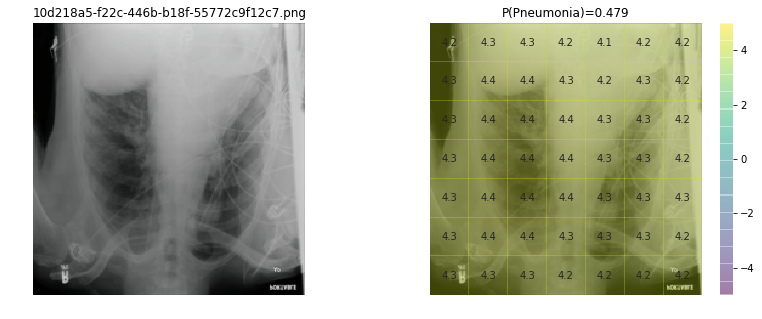

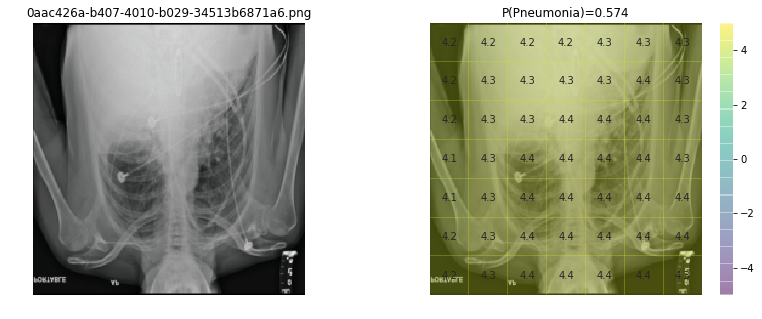

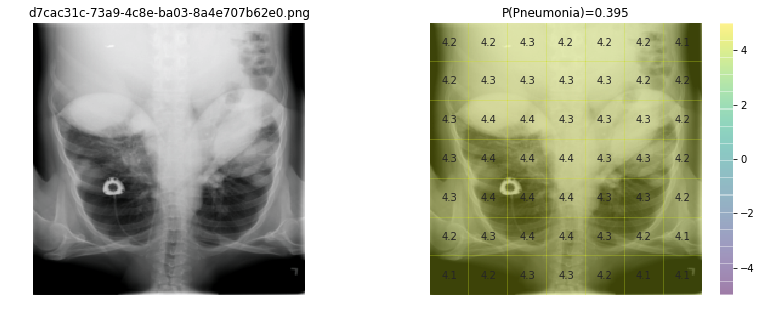

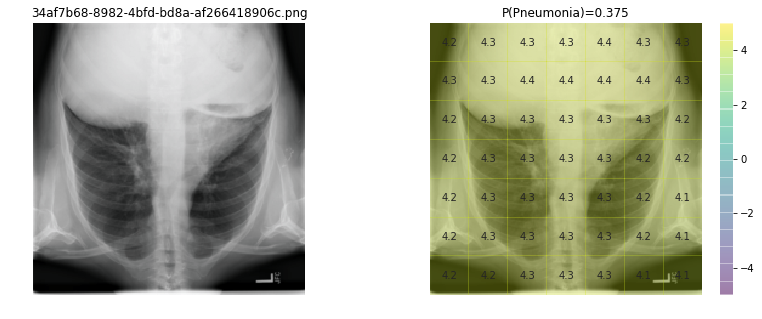

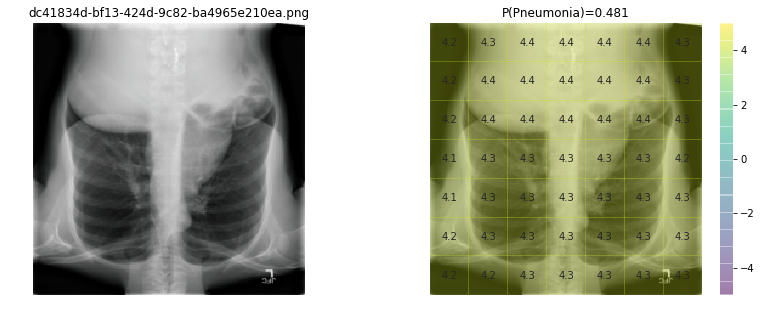

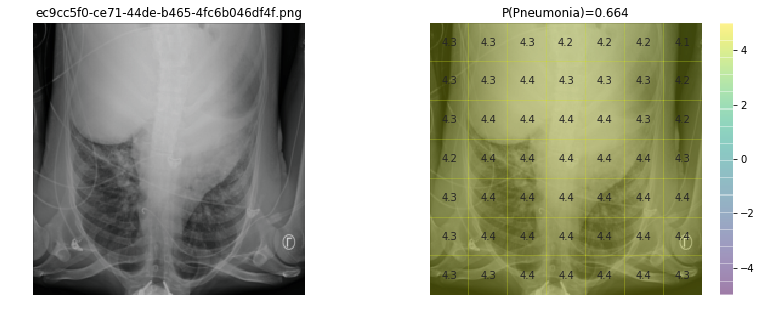

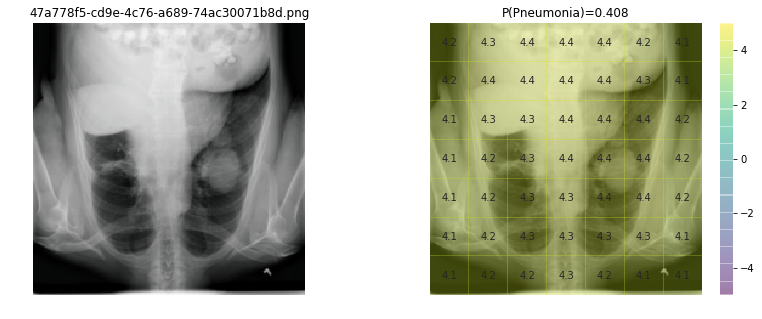

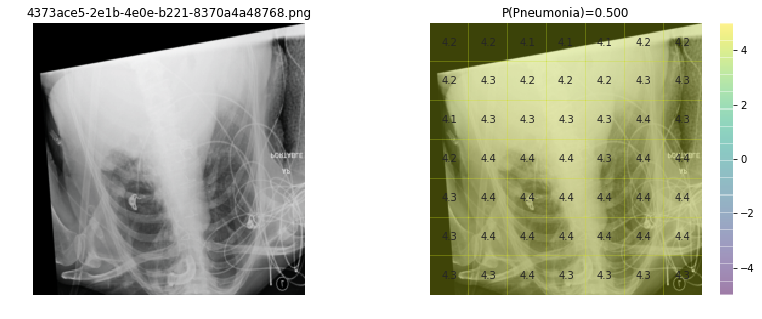

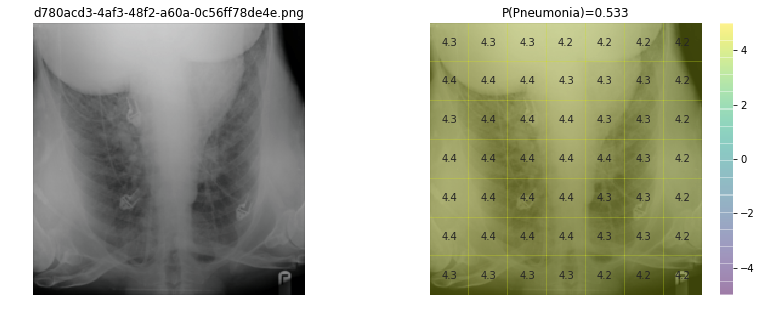

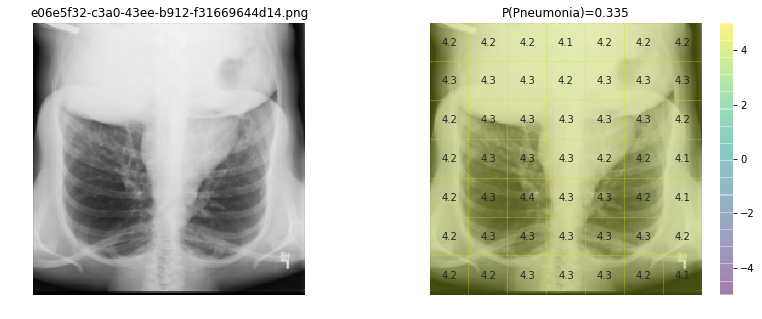

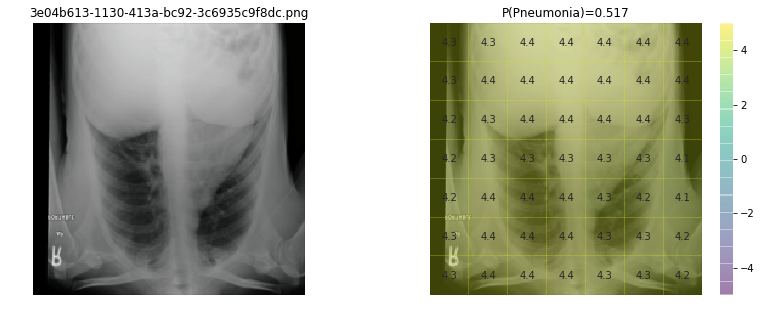

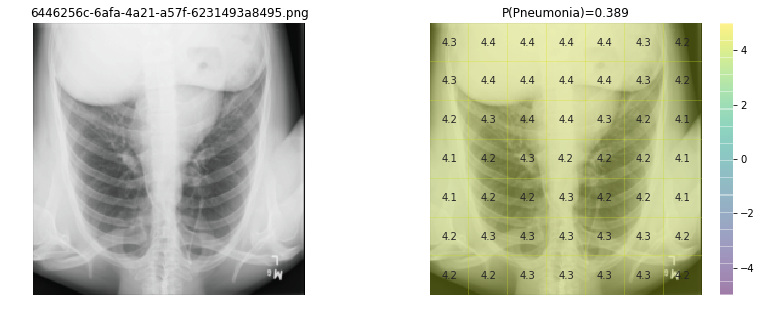

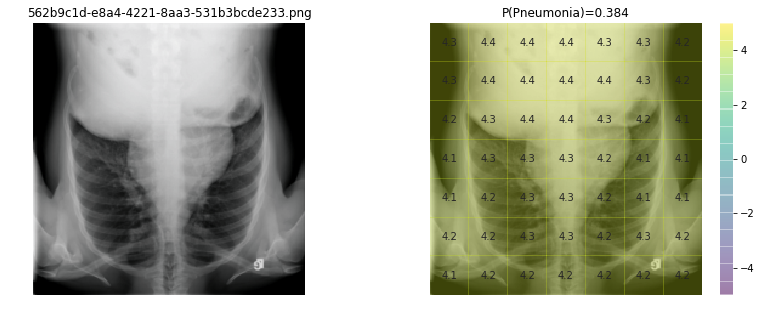

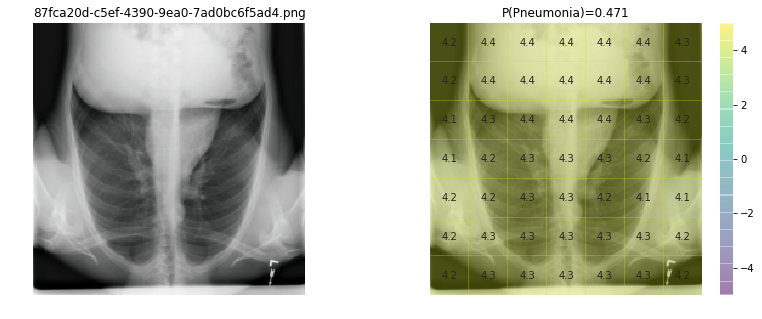

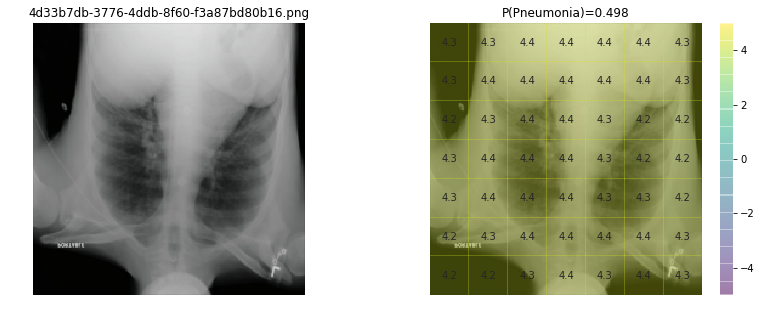

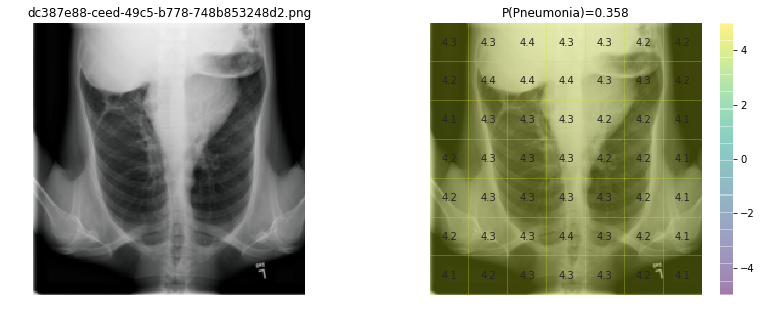

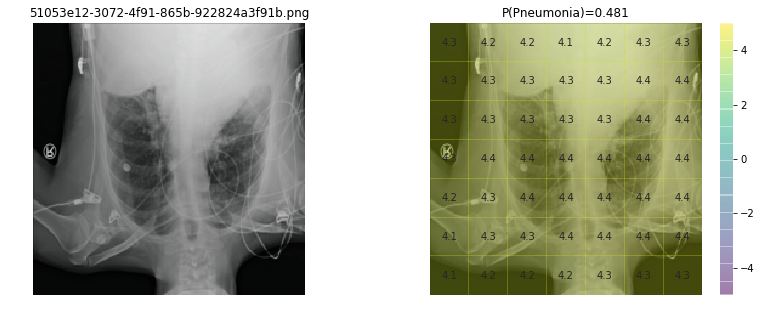

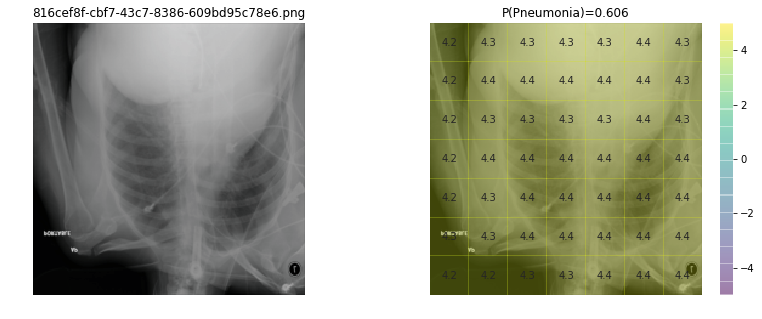

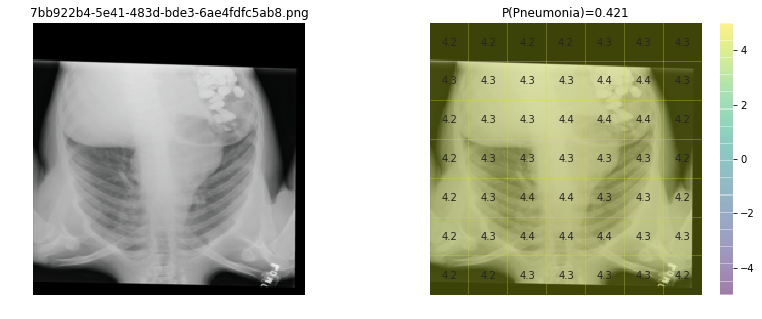

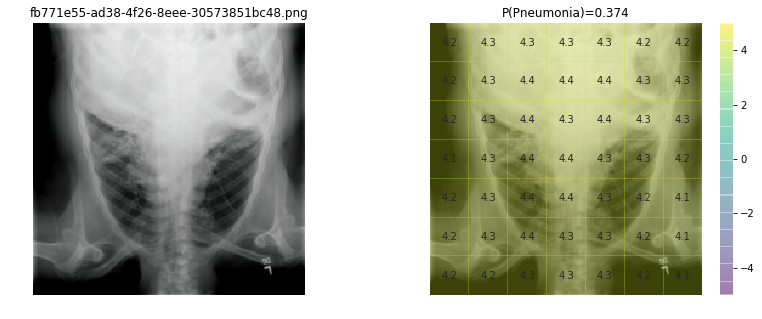

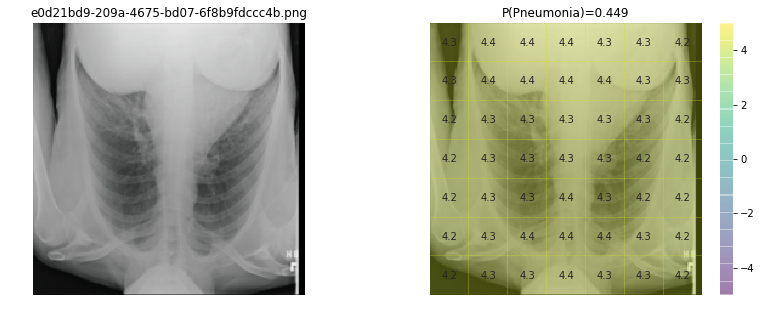

KeyboardInterrupt: 

In [5]:
l = []
for i in range(len(dataloader)):
    preds = V.show_next(dataloader, model, LABEL)
    v = preds[preds['Finding'] == LABEL]['Predicted Probability'].values.astype('float')
    y = preds[preds['Finding'] == LABEL]['Ground Truth'].values.astype('int')
    l.append((v[0],y[0]))

print(l)
    